In [1]:
import matplotlib.pyplot as plt
import jax
import jax.numpy as jnp
import numpy as np


[[ 4.238765  ]
 [ 1.4831488 ]
 [-0.24489282]
 [-0.00865918]
 [-0.01848036]]


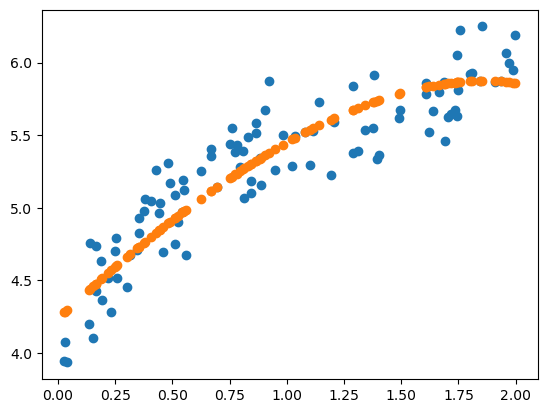

In [7]:
n = 100

x = 2*np.random.rand(n,1)
y = 4 + 3*x -2*x**2 + 0.5*x**3 + 0.2*np.random.randn(n,1)

degree = 5

X = np.fliplr(np.vander(x.flatten(), degree))

def CostOLS(beta):
    return (1.0/n)*np.sum((y-X @ beta)**2)

traning_gradient = jax.grad(CostOLS)
iterations = 1000

gamma = 0.01

beta = np.random.randn(degree, 1)
# print(beta)
    
for iter in range(iterations):
    gradient = traning_gradient(beta)
    beta -= gamma*gradient
print(beta)
# Plotting
y_reg = X@beta
plt.scatter(x, y)
plt.scatter(x, y_reg)
plt.show()


[[ 4.182598  ]
 [ 1.2019764 ]
 [ 0.9368381 ]
 [-1.0473964 ]
 [ 0.24298196]]


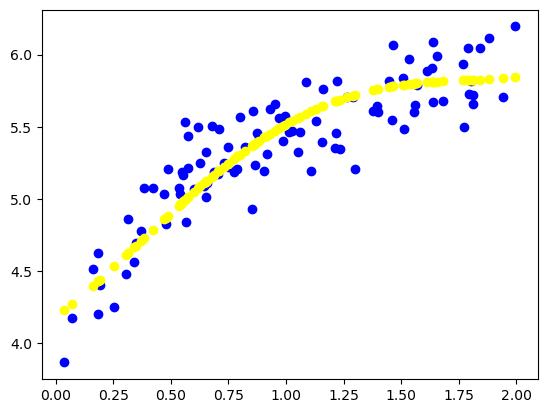

In [3]:
## Now using momentum

n = 100

x = 2*np.random.rand(n,1)
y = 4 + 3*x -2*x**2 + 0.5*x**3 + 0.2*np.random.randn(n,1)

degree = 5

X = np.fliplr(np.vander(x.flatten(), degree))

def CostOLS(beta):
    return (1.0/n)*np.sum((y-X @ beta)**2)

traning_gradient = jax.grad(CostOLS)
iterations = 1000

learning_rate = 0.01
d_momentum = 0.1
change = 0.0

beta = np.random.randn(degree, 1)
# print(beta)
    
for iter in range(iterations):
    gradient = traning_gradient(beta)
    change = learning_rate*gradient + d_momentum*change
    # print("Change: " + str(change))
    beta -= change
print(beta)
# Plotting
y_reg = X@beta
plt.scatter(x, y, color="blue")
plt.scatter(x, y_reg, color="yellow")
plt.show()

### Basic gradient descent

Here we use the definition of the derivative of the cost function 
$$C(\beta) = \frac{1}{n} \{(y-X\beta)^T(y-X\beta)\}$$
as: 
$$\frac{\partial C(\beta)}{\partial \beta} = - \frac{2}{n} X^T (y-X\beta)$$
The $\textit{gamma}$ ($\gamma$) value represents the learning rate. The code essentially travels one step $\gamma$ in the opposite direction of the gradient $\nabla C(\beta)$.

[[ 4.22122574]
 [ 1.63490925]
 [-0.94586716]
 [ 0.82283189]
 [-0.28780482]]


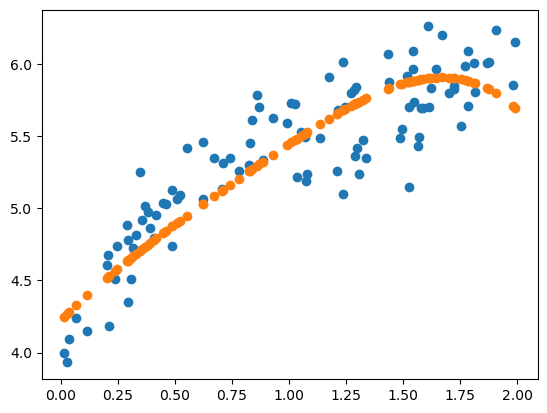

In [12]:
n = 100

x = 2*np.random.rand(n,1)
y = 4 + 3*x -2*x**2 + 0.5*x**3 + 0.2*np.random.randn(n,1)

degree = 5

X = np.fliplr(np.vander(x.flatten(), degree))

iterations = 1000

gamma = 0.01

beta = np.random.randn(degree, 1)
beta_test = beta
# print(beta)
    
for iter in range(iterations):
    gradient = -(2/n)*X.T@(y-X@beta)
    beta -= gamma*gradient
    
print(beta)
# Plotting
y_reg = X@beta
plt.scatter(x, y)
plt.scatter(x, y_reg)
plt.show()

### Momentum gradient descent
This code functions the same as the regular gradient descent, but in addition to the $\gamma \cdot \nabla C(\beta)$ step, this is then added to the momentum constant multiplied with the previous change. This effectivly allows the step to change dynamically based on what happened previously.

[[ 4.12239529]
 [ 1.84204972]
 [-0.46286863]
 [-0.0382717 ]
 [ 0.00692899]]


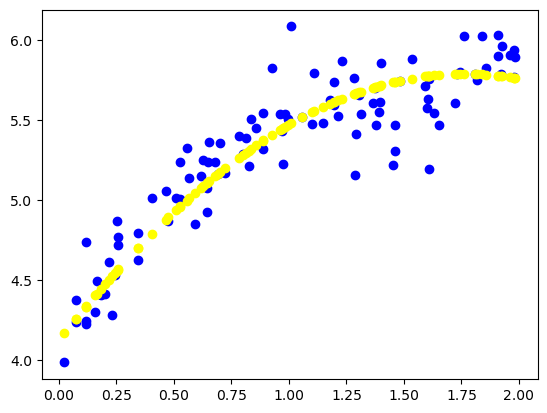

In [14]:
## Now using momentum

n = 100

x = 2*np.random.rand(n,1)
y = 4 + 3*x -2*x**2 + 0.5*x**3 + 0.2*np.random.randn(n,1)

degree = 5

X = np.fliplr(np.vander(x.flatten(), degree))

iterations = 1000

gamma = 0.01
d_momentum = 0.1
change = 0.0

beta = np.random.randn(degree, 1)
# print(beta)
    
for iter in range(iterations):
    gradient = -(2/n)*X.T@(y-X@beta)
    change = gamma*gradient + d_momentum*change
    beta -= change
print(beta)
# Plotting
y_reg = X@beta
plt.scatter(x, y, color="blue")
plt.scatter(x, y_reg, color="yellow")
plt.show()